In [1]:
import numpy as np

def make_test_graph(n, p):
    r = [0,1]
    A = np.tril(np.random.default_rng().choice(a=r, size=(n,n),p=[1-p, p]), k=-1)
    A = A + A.T
    return A

def draw_graph(A):
    import networkx as nx
    A_ = np.copy(A)
    G = nx.Graph(A_)
    nx.draw(G, labels={i:f'{i}' for i in range(A.shape[0])})

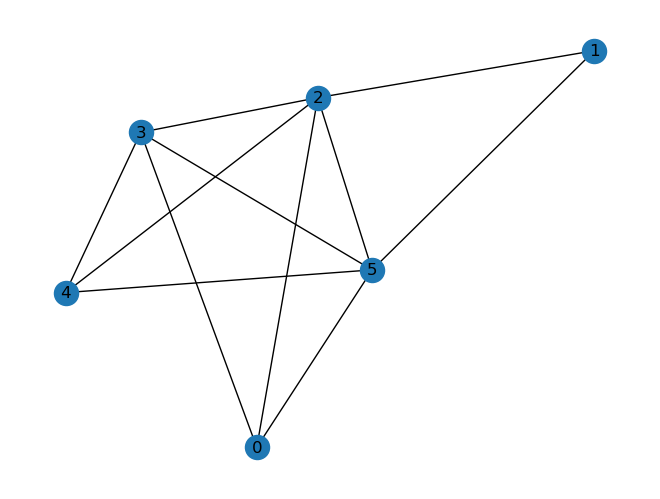

In [2]:
n = 6
A = make_test_graph(n, 0.6)
draw_graph(A)

In [3]:
from importlib import reload
import fw
reload(fw)
from fw import maxclique_grad, maxclique_lmo
np.random.seed(42)

x_0 = np.random.uniform(low=0.0, high=1.0, size=n)
x_0 /= np.sum(x_0)

x_hist, s_hist = fw.frankwolfe(
    grad = lambda x: -maxclique_grad(A, x,penalty='f2', alpha=1, beta=0.1),
    lmo = maxclique_lmo, max_iter = 10000, x_0 = x_0)

In [4]:
x = x_hist[-1]
1./(1.-np.dot(np.dot(x.T,A),x))

3.999999800040093

In [5]:
x_hist[-1]

array([0.249975  , 0.        , 0.250025  , 0.25007499, 0.        ,
       0.24992501])

In [8]:
from importlib import reload
import testing
reload(testing)

graph, graph_size, clique = testing.read_dimacs_brock('DIMACS/brock200_2.clq')